# Etude sur l'empreinte carbone



In [106]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [107]:
filepath = '/Users/jl/Downloads/student-responses-without-ids.csv'
data = pd.read_csv(filepath, index_col='Timestamp')

# Réorganiser le dataset

In [108]:
data.head()

,Age group:,Education status:,Work status:,How do you travel to work/university?,"On average, how long does it take you to travel to work/university?",How engaged do you feel with the issue of climate change?,Do you know what a carbon footprint is?,How aware are you of your own carbon footprint?,How do you currently measure your own carbon footprint?,"What sources of information do you use, if any, to measure your carbon footprint?",Do you feel having more information about your carbon footprint would be useful?,Would having more information about your carbon footprint be likely to change your habits?,"What kind of motivation, if any, would you need in order to change one of your habits for a more environmentally friendly one?","How have you tried to reduce your carbon footprint, if at all?",How much do you care about trying to reduce your carbon footprint?,What do you consider to be the hardest part about trying to reduce your carbon footprint?,Have you tried to encourage others to reduce their carbon footprint?,Data Protection Agreement
Timestamp,,,,,,,,,,,,,,,,,,
2019/11/15 10:10:07 am GMT,18–22,In full-time education,Not working at all,Walk / Cycle,Less than 15 minutes,4,Yes,2,1,None,5,Maybe,An app which gives me reminders of what I coul...,I have not tried to reduce my carbon footprint,5,Effort of it ngl,No,I agree
2019/11/15 10:10:26 am GMT,18–22,In full-time education,Part-time,Walk / Cycle,Less than 15 minutes,3,Yes,1,1,None,3,Maybe,That me as a person changing something would a...,I have not tried to reduce my carbon footprint,3,I don't know what I could change,No,I agree
2019/11/15 10:10:33 am GMT,18–22,In full-time education,Not working at all,Walk / Cycle,Less than an hour,3,Yes,2,1,None,5,Maybe,Knowing where to start.,Changed how I travel,4,Not knowing where to start.,No,I agree
2019/11/15 10:10:43 am GMT,18–22,In full-time education,Part-time,Walk / Cycle,Less than 15 minutes,2,Yes,1,1,None,4,Yes,Monetary,I have not tried to reduce my carbon footprint,4,Reducing energy consumption,No,I agree
2019/11/15 10:10:49 am GMT,18–22,In full-time education,Not working at all,Walk / Cycle,Less than 15 minutes,2,No,1,2,None,2,No,enviromint,no,2,what is carbon footprint?,No,I agree


In [109]:
# Seules les réponses qui ont été acceptées ont été collectées, cette colonne n'est donc pas nécessaire
data.drop(columns=['Data Protection Agreement'], inplace=True)

# Renommer les colonnes des questions originales avec des noms plus faciles à utiliser
data.rename(columns={
    'Age group:':'age_group',
    'Education status:':'education',
    'Work status:':'working',
    'How do you travel to work/university?':'travel_transport',
    'On average, how long does it take you to travel to work/university?':'average_travel_duration',
    'How engaged do you feel with the issue of climate change?':'climate_change_engagement',
    'Do you know what a carbon footprint is?':'carbon_footprint_definition_knowledge',
    'How aware are you of your own carbon footprint?':'carbon_footprint_awareness',
    'How do you currently measure your own carbon footprint?':'carbon_footprint_rating',
    'What sources of information do you use, if any, to measure your carbon footprint?':'carbon_footprint_sources',
    'Do you feel having more information about your carbon footprint would be useful?':'carbon_footprint_info_useful',
    'Would having more information about your carbon footprint be likely to change your habits?':'carbon_footprint_info_change_habits',
    'What kind of motivation, if any, would you need in order to change one of your habits for a more environmentally friendly one?':'habit_change_motivation',
    'How have you tried to reduce your carbon footprint, if at all?':'carbon_footprint_reduction_methods',
    'How much do you care about trying to reduce your carbon footprint?':'carbon_footprint_reduction_desire',
    'What do you consider to be the hardest part about trying to reduce your carbon footprint?':'carbon_footprint_reduction_difficulties',
    'Have you tried to encourage others to reduce their carbon footprint?':'encouraged_others_to_reduce_carbon'
}, inplace=True)

data.carbon_footprint_reduction_difficulties = data.carbon_footprint_reduction_difficulties.str.lower()
data.habit_change_motivation = data.habit_change_motivation.str.lower()

data.head()

,age_group,education,working,travel_transport,average_travel_duration,climate_change_engagement,carbon_footprint_definition_knowledge,carbon_footprint_awareness,carbon_footprint_rating,carbon_footprint_sources,carbon_footprint_info_useful,carbon_footprint_info_change_habits,habit_change_motivation,carbon_footprint_reduction_methods,carbon_footprint_reduction_desire,carbon_footprint_reduction_difficulties,encouraged_others_to_reduce_carbon
Timestamp,,,,,,,,,,,,,,,,,
2019/11/15 10:10:07 am GMT,18–22,In full-time education,Not working at all,Walk / Cycle,Less than 15 minutes,4,Yes,2,1,None,5,Maybe,an app which gives me reminders of what i coul...,I have not tried to reduce my carbon footprint,5,effort of it ngl,No
2019/11/15 10:10:26 am GMT,18–22,In full-time education,Part-time,Walk / Cycle,Less than 15 minutes,3,Yes,1,1,None,3,Maybe,that me as a person changing something would a...,I have not tried to reduce my carbon footprint,3,i don't know what i could change,No
2019/11/15 10:10:33 am GMT,18–22,In full-time education,Not working at all,Walk / Cycle,Less than an hour,3,Yes,2,1,None,5,Maybe,knowing where to start.,Changed how I travel,4,not knowing where to start.,No
2019/11/15 10:10:43 am GMT,18–22,In full-time education,Part-time,Walk / Cycle,Less than 15 minutes,2,Yes,1,1,None,4,Yes,monetary,I have not tried to reduce my carbon footprint,4,reducing energy consumption,No
2019/11/15 10:10:49 am GMT,18–22,In full-time education,Not working at all,Walk / Cycle,Less than 15 minutes,2,No,1,2,None,2,No,enviromint,no,2,what is carbon footprint?,No


# Comprendre le dataset

In [110]:
print("Total Row Count: {0} \nTotal Column Count: {1}".format(data.shape[0], data.shape[1]))

Total Row Count: 86 
Total Column Count: 17


In [111]:
data.head()

,age_group,education,working,travel_transport,average_travel_duration,climate_change_engagement,carbon_footprint_definition_knowledge,carbon_footprint_awareness,carbon_footprint_rating,carbon_footprint_sources,carbon_footprint_info_useful,carbon_footprint_info_change_habits,habit_change_motivation,carbon_footprint_reduction_methods,carbon_footprint_reduction_desire,carbon_footprint_reduction_difficulties,encouraged_others_to_reduce_carbon
Timestamp,,,,,,,,,,,,,,,,,
2019/11/15 10:10:07 am GMT,18–22,In full-time education,Not working at all,Walk / Cycle,Less than 15 minutes,4,Yes,2,1,None,5,Maybe,an app which gives me reminders of what i coul...,I have not tried to reduce my carbon footprint,5,effort of it ngl,No
2019/11/15 10:10:26 am GMT,18–22,In full-time education,Part-time,Walk / Cycle,Less than 15 minutes,3,Yes,1,1,None,3,Maybe,that me as a person changing something would a...,I have not tried to reduce my carbon footprint,3,i don't know what i could change,No
2019/11/15 10:10:33 am GMT,18–22,In full-time education,Not working at all,Walk / Cycle,Less than an hour,3,Yes,2,1,None,5,Maybe,knowing where to start.,Changed how I travel,4,not knowing where to start.,No
2019/11/15 10:10:43 am GMT,18–22,In full-time education,Part-time,Walk / Cycle,Less than 15 minutes,2,Yes,1,1,None,4,Yes,monetary,I have not tried to reduce my carbon footprint,4,reducing energy consumption,No
2019/11/15 10:10:49 am GMT,18–22,In full-time education,Not working at all,Walk / Cycle,Less than 15 minutes,2,No,1,2,None,2,No,enviromint,no,2,what is carbon footprint?,No


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 2019/11/15 10:10:07 am GMT to 2019/12/27 5:25:36 am GMT
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   age_group                                86 non-null     object
 1   education                                86 non-null     object
 2   working                                  86 non-null     object
 3   travel_transport                         86 non-null     object
 4   average_travel_duration                  86 non-null     object
 5   climate_change_engagement                86 non-null     int64 
 6   carbon_footprint_definition_knowledge    86 non-null     object
 7   carbon_footprint_awareness               86 non-null     int64 
 8   carbon_footprint_rating                  86 non-null     int64 
 9   carbon_footprint_sources                 86 non-null     object
 10  carbon_footprint_info

In [113]:
data.isnull().sum()

age_group                                  0
education                                  0
working                                    0
travel_transport                           0
average_travel_duration                    0
climate_change_engagement                  0
carbon_footprint_definition_knowledge      0
carbon_footprint_awareness                 0
carbon_footprint_rating                    0
carbon_footprint_sources                   0
carbon_footprint_info_useful               0
carbon_footprint_info_change_habits        0
habit_change_motivation                    0
carbon_footprint_reduction_methods         0
carbon_footprint_reduction_desire          0
carbon_footprint_reduction_difficulties    1
encouraged_others_to_reduce_carbon         0
dtype: int64

In [114]:
data.dropna(axis=0, inplace=True);

# Data Visualisation

Démographie

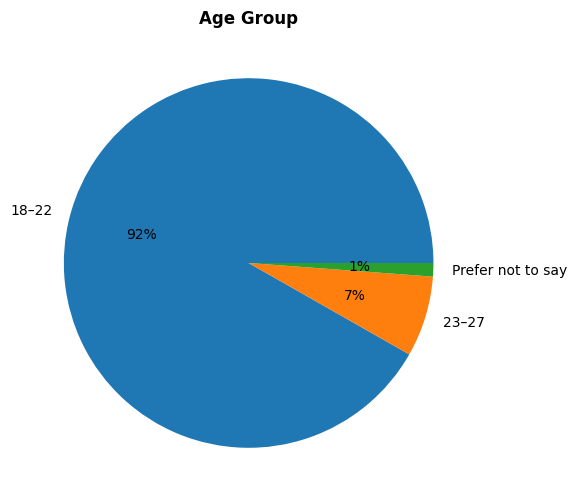

In [115]:
_,ax = plt.subplots(figsize=(8,6))
data.age_group.value_counts().plot(kind='pie', ax=ax, autopct='%.0f%%')
ax.set_title('Age Group', weight='bold')
ax.set_ylabel(None);

In [116]:
data.education.value_counts()

In full-time education    85
Name: education, dtype: int64

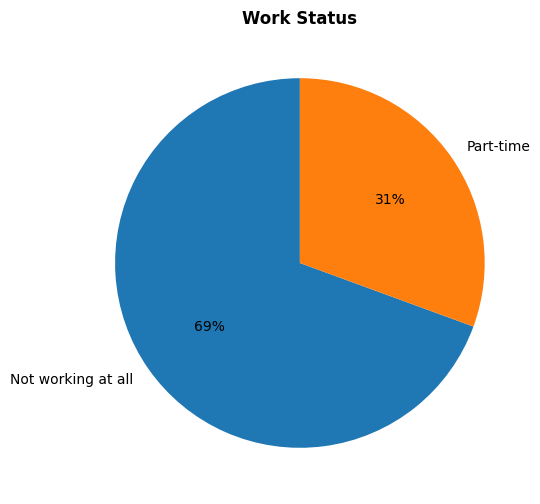

In [117]:
_,ax = plt.subplots(figsize=(8,6))
data.working.value_counts().plot(kind='pie', autopct='%.0f%%', startangle=90, ax=ax)
ax.set_title('Work Status', weight='bold')
ax.set_ylabel(None); 

# Estimation de l'impact carbone des déplacements

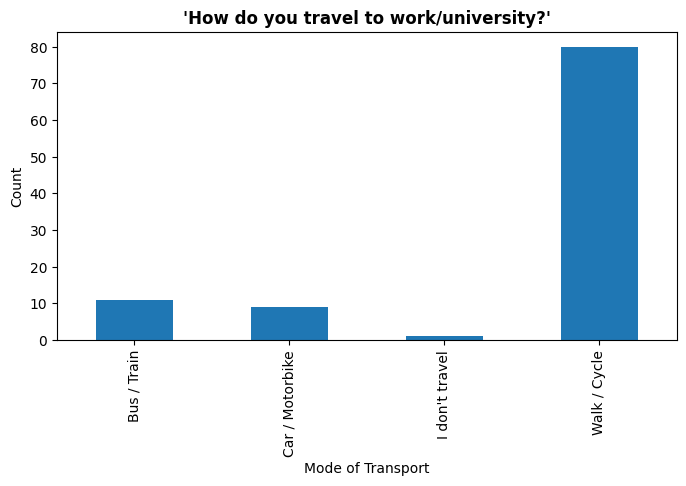

In [118]:
mode_of_transport = data.travel_transport.str.get_dummies(';').astype('bool').sum()

_,ax = plt.subplots(figsize=(8,4))
mode_of_transport.plot(ax=ax, kind="bar")

ax.set_title('\'How do you travel to work/university?\'', weight='bold')
ax.set_ylabel('Count')
ax.set_xlabel('Mode of Transport');

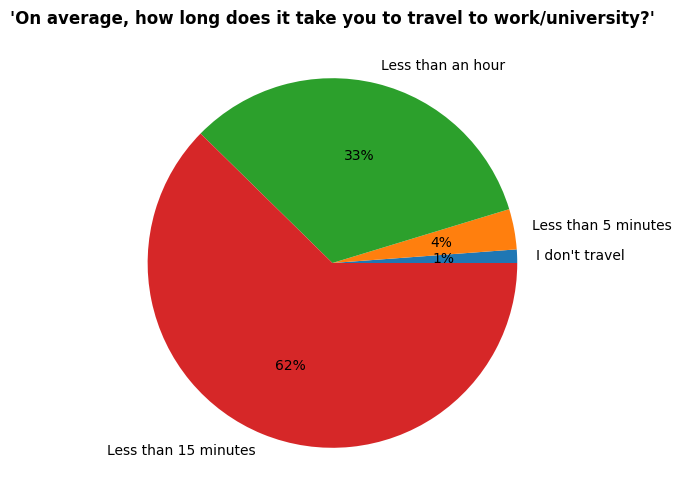

In [119]:
_,ax = plt.subplots(figsize=(8,6))
data.average_travel_duration.value_counts().sort_values().plot(kind='pie', autopct='%.0f%%', ax=ax)
ax.set_title('\'On average, how long does it take you to travel to work/university?\'', weight='bold')
ax.set_ylabel(None);

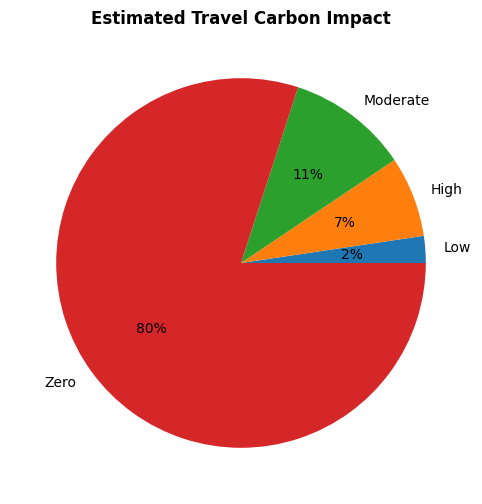

In [120]:
# Fournir une indication générale de l'impact carbone des déplacements des participants.

# Hypothèses :
# Voiture, moto, bus, train, tous supposés polluants et à essence/diesel plutôt qu'électriques, à hydrogène ou hybrides.
# Bus/trains moins polluants que les voitures/motos, comme le suggère le ministère britannique des affaires, de l'énergie et de la stratégie industrielle :
# https://www.gov.uk/government/publications/greenhouse-gas-reporting-conversion-factors-2019

conditions = [
    # High impact
    (data.average_travel_duration == 'Less than an hour') & (data.travel_transport.str.contains('Car / Motorbike')),
    # Moderate impact
    (data.average_travel_duration == 'Less than an hour') & (data.travel_transport.str.contains('Bus / Train')),
    # Moderate impact
    (data.average_travel_duration == 'Less than 15 minutes') & (data.travel_transport.str.contains('Car / Motorbike')),
    # Low impact
    (data.average_travel_duration == 'Less than 15 minutes') & (data.travel_transport.str.contains('Bus / Train')),
    # Zero impact
    (data.travel_transport.str.contains('Walk / Cycle')) | (data.travel_transport.str.contains('I don\'t travel'))]
choices = ['High', 'Moderate', 'Moderate', 'Low', 'Zero']
data['estimated_carbon_impact'] = np.select(conditions, choices, default='Zero')

_,ax = plt.subplots(figsize=(8,6))
data['estimated_carbon_impact'].value_counts().sort_values().plot(kind='pie', autopct='%.0f%%', ax=ax)
ax.set_title('Estimated Travel Carbon Impact', weight='bold')
ax.set_ylabel(None);

# Empreinte carbone

le changement climatique

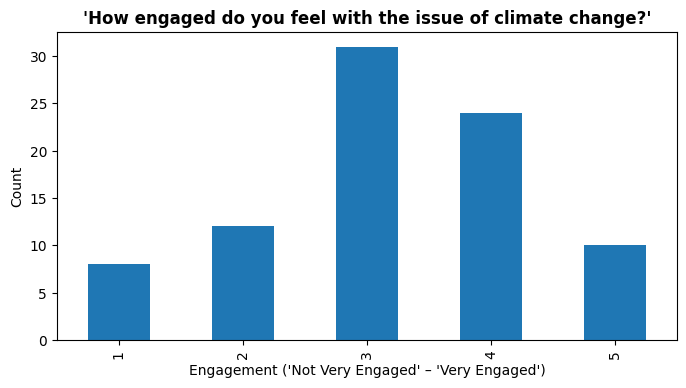

In [121]:
climate_change_engagement = data.climate_change_engagement.value_counts().sort_index()

_,ax = plt.subplots(figsize=(8,4))
climate_change_engagement.plot(ax=ax, kind="bar")

ax.set_title('\'How engaged do you feel with the issue of climate change?\'', weight='bold')
ax.set_ylabel('Count')
ax.set_xlabel('Engagement (\'Not Very Engaged\' – \'Very Engaged\')');

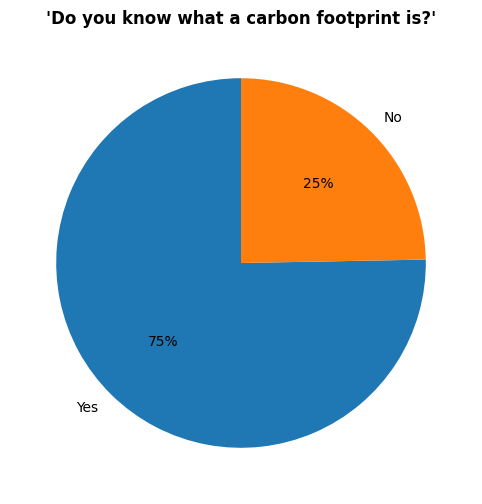

In [122]:
_,ax = plt.subplots(figsize=(8,6))
data.carbon_footprint_definition_knowledge.value_counts().plot(kind='pie', autopct='%.0f%%', startangle=90, ax=ax)
ax.set_title('\'Do you know what a carbon footprint is?\'', weight='bold')
ax.set_ylabel(None);

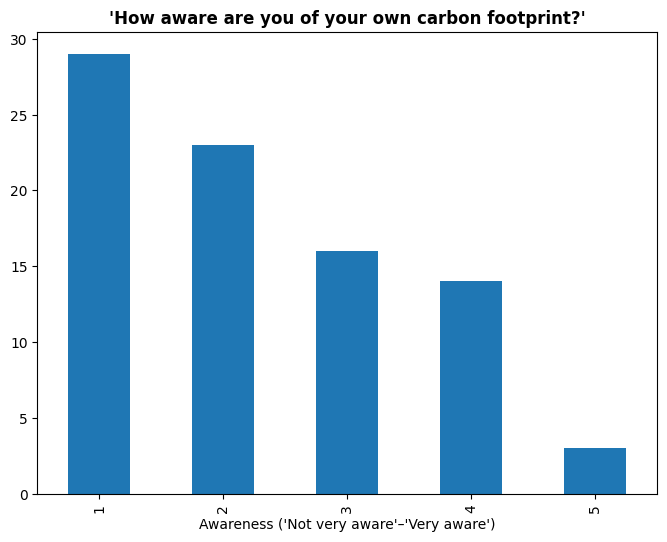

In [123]:
_,ax = plt.subplots(figsize=(8,6))
data.carbon_footprint_awareness.value_counts().plot(kind='bar', ax=ax)
ax.set_title('\'How aware are you of your own carbon footprint?\'', weight='bold');
ax.set_xlabel('Awareness (\'Not very aware\'–\'Very aware\')');

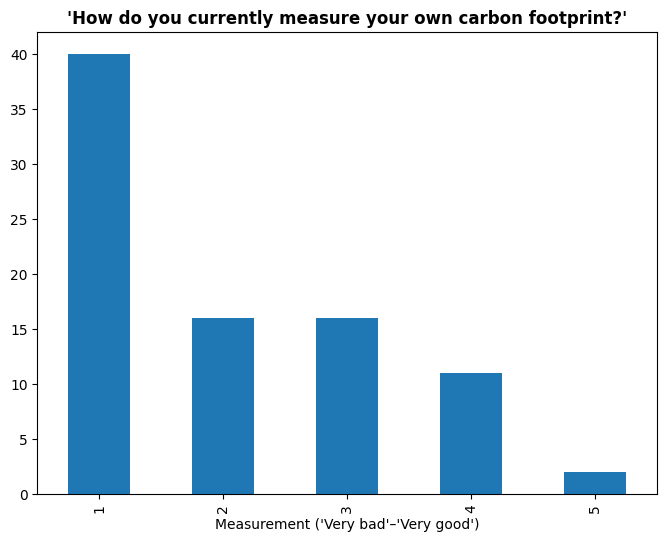

In [124]:
_,ax = plt.subplots(figsize=(8,6))
data.carbon_footprint_rating.value_counts().sort_index().plot(kind='bar', ax=ax)
ax.set_title('\'How do you currently measure your own carbon footprint?\'', weight='bold');
ax.set_xlabel('Measurement (\'Very bad\'–\'Very good\')');

# Quelles sources d'information utiliser pour mesurer notre empreinte carbone ?

In [125]:
print('What sources of information do you use, if any, to measure your carbon footprint?')
data.carbon_footprint_sources.value_counts()

What sources of information do you use, if any, to measure your carbon footprint?


None                                82
news / internet articles             1
Smart meter                          1
wwf carbon footprint calculator      1
Name: carbon_footprint_sources, dtype: int64

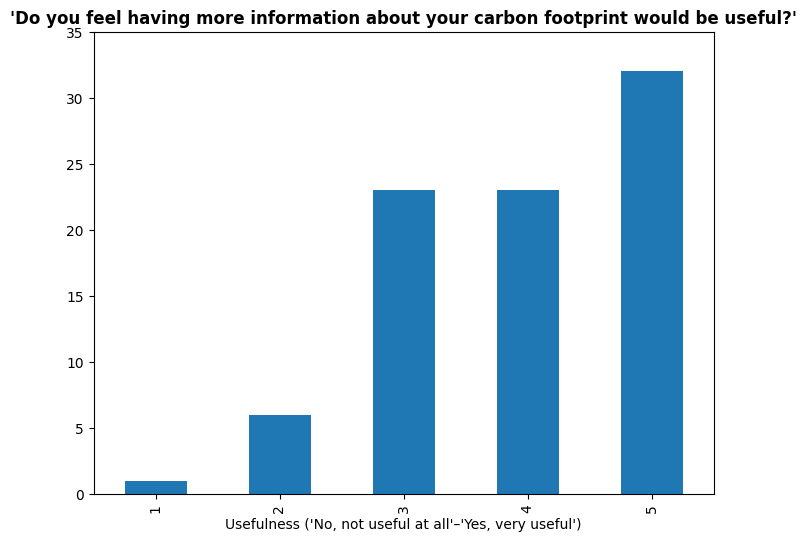

In [126]:
carbon_footprint_info_useful_value_counts = data.carbon_footprint_info_useful.value_counts().sort_index().reindex(range(1,6), fill_value=0)

_,ax = plt.subplots(figsize=(8,6))
carbon_footprint_info_useful_value_counts.plot(kind='bar', ax=ax, ylim=(0, 35))

ax.set_title('\'Do you feel having more information about your carbon footprint would be useful?\'', weight='bold');
ax.set_xlabel('Usefulness (\'No, not useful at all\'–\'Yes, very useful\')');

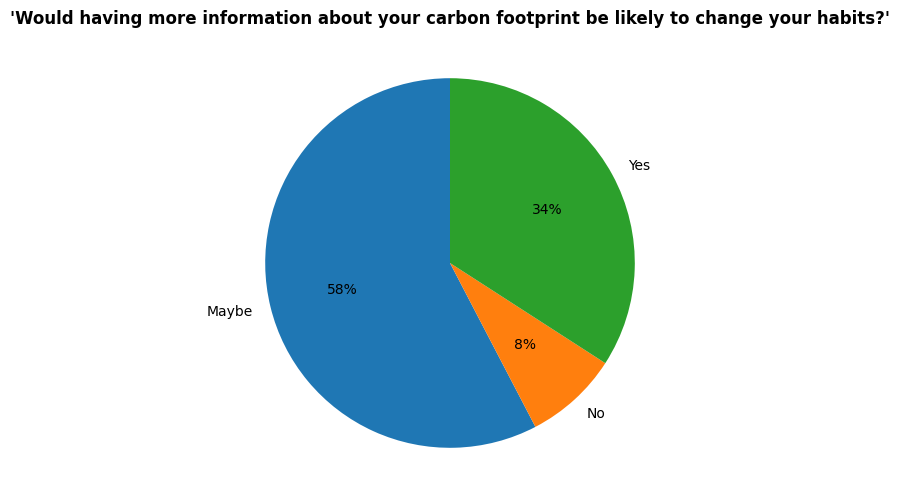

In [127]:
_,ax = plt.subplots(figsize=(8,6))
data.carbon_footprint_info_change_habits.value_counts().sort_index().plot(kind='pie', autopct='%.0f%%', startangle=90, ax=ax)
ax.set_title('\'Would having more information about your carbon footprint be likely to change your habits?\'', weight='bold')
ax.set_ylabel(None);

# La connaissance de l'impact sur l'environnement comme facteur de motivation pour une habitude plus respectueuse de l'environnement

In [128]:
knowledge_of_impact_responses = list(filter(lambda response: any(word in response.lower() for word in ['impact','consequences', 'climate', 'evidence', 'effects', 'enviromint', 'education']), habit_change_motivation_responses))

print("Responses to the question: 'What kind of motivation, if any, would you need in order to change one of your habits for a more environmentally friendly one?'")
print("{} responses ({:.0f}%) mentioned knowledge of impact on the environment as a motivator.".format(len(knowledge_of_impact_responses),len(knowledge_of_impact_responses)/len(data)*100))

Responses to the question: 'What kind of motivation, if any, would you need in order to change one of your habits for a more environmentally friendly one?'
13 responses (15%) mentioned knowledge of impact on the environment as a motivator.


# Réduction de l'empreinte carbone individuelle

# méthodes

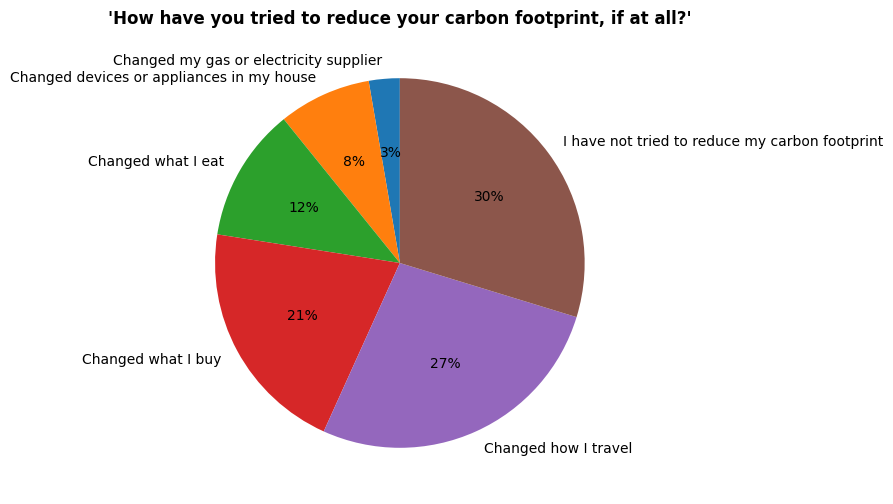

In [129]:
reduction_methods = data.carbon_footprint_reduction_methods.str.get_dummies(sep=';').sum().sort_values()
reduction_methods = reduction_methods.loc[reduction_methods > 1]

_,ax = plt.subplots(figsize=(8,6))

reduction_methods.plot(kind='pie', autopct='%.0f%%', startangle=90, ax=ax)

ax.set_title('\'How have you tried to reduce your carbon footprint, if at all?\'', weight='bold')
ax.set_ylabel(None);

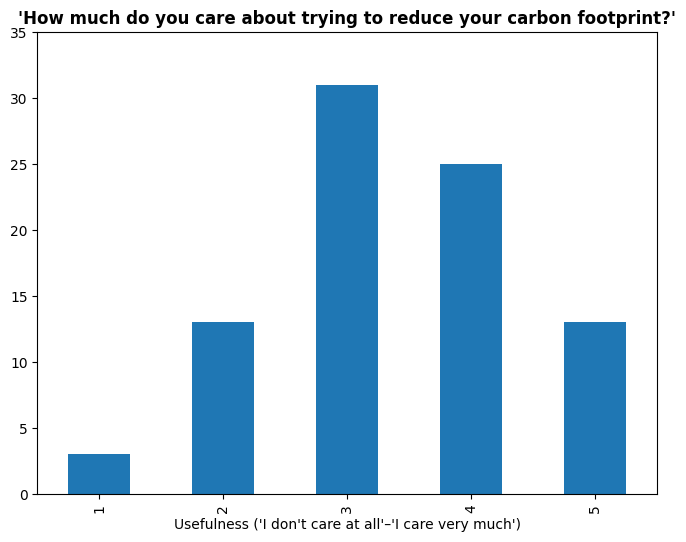

In [130]:
carbon_footprint_reduction_desire_counts = data.carbon_footprint_reduction_desire.value_counts().sort_index()

_,ax = plt.subplots(figsize=(8,6))
carbon_footprint_reduction_desire_counts.plot(kind='bar', ax=ax, ylim=(0, 35))

ax.set_title('\'How much do you care about trying to reduce your carbon footprint?\'', weight='bold');
ax.set_xlabel('Usefulness (\'I don\'t care at all\'–\'I care very much\')');

# l'aspect le plus difficile de la réduction de l'empreinte carbone

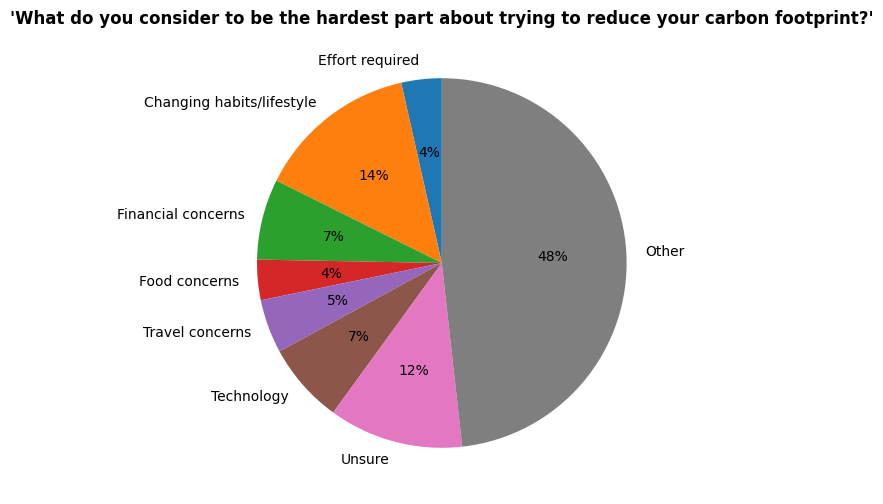

In [131]:
reduction_difficulties = data.carbon_footprint_reduction_difficulties.values

def count_responses_containing(words):
    return len(list(filter(lambda r: any(w in r for w in words), reduction_difficulties)))

effort_response_count = count_responses_containing(['effort'])
habit_response_count = count_responses_containing(['habit','lifestyle','day to day','day-to-day','daily'])
money_response_count = count_responses_containing(['cost','money'])
unsure_response_count =  count_responses_containing(['not know', 'dont know', 'don\'t know', 'no idea', 'not sure', 'knowing how'])
food_response_count = len(list(filter(lambda r: any(w in r.split() for w in ['food','eat','dairy']), reduction_difficulties)))
travel_response_count =  count_responses_containing(['travel','transport'])
tech_response_count =  count_responses_containing(['energy','power','technology','devices'])

all_response_count = len(reduction_difficulties)
other_response_count = all_response_count - sum([effort_response_count,habit_response_count,money_response_count,food_response_count,travel_response_count,tech_response_count,unsure_response_count])

sizes = [effort_response_count,habit_response_count,money_response_count,food_response_count,travel_response_count,tech_response_count,unsure_response_count,other_response_count]
labels = ['Effort required', 'Changing habits/lifestyle', 'Financial concerns', 'Food concerns', 'Travel concerns', 'Technology', 'Unsure', 'Other']

_,ax = plt.subplots(figsize=(8,6))
ax.pie(sizes, labels=labels, autopct='%0.0f%%', startangle=90)

ax.set_title('\'What do you consider to be the hardest part about trying to reduce your carbon footprint?\'', weight='bold')
ax.set_ylabel(None);

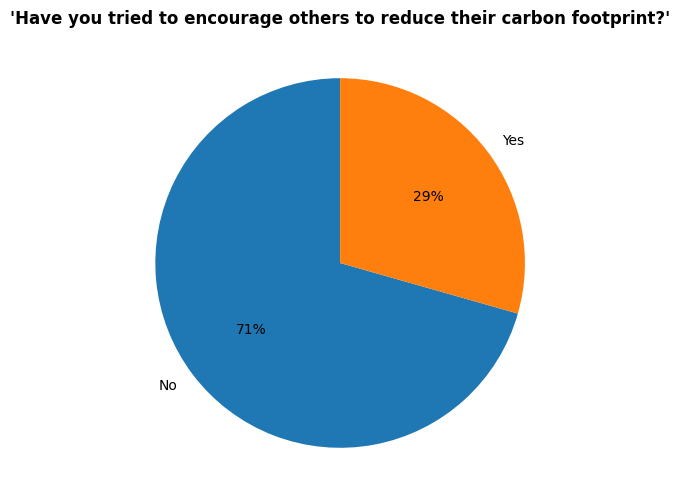

In [132]:
_,ax = plt.subplots(figsize=(8,6))
data.encouraged_others_to_reduce_carbon.value_counts().plot(kind='pie', startangle=90, autopct='%0.0f%%', ax=ax)
ax.set_title('\'Have you tried to encourage others to reduce their carbon footprint?\'', weight='bold')
ax.set_ylabel(None);

# Corrélations des données

In [133]:
data.corr()

/var/folders/r5/sycktgpj0ln8vbwphhbh5mb00000gn/T/ipykernel_58972/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,climate_change_engagement,carbon_footprint_awareness,carbon_footprint_rating,carbon_footprint_info_useful,carbon_footprint_reduction_desire
climate_change_engagement,1.000000,0.287928,0.343901,0.314215,0.401074
carbon_footprint_awareness,0.287928,1.000000,0.174641,0.074674,0.210341
carbon_footprint_rating,0.343901,0.174641,1.000000,0.042159,0.140796
carbon_footprint_info_useful,0.314215,0.074674,0.042159,1.000000,0.532453
carbon_footprint_reduction_desire,0.401074,0.210341,0.140796,0.532453,1.000000


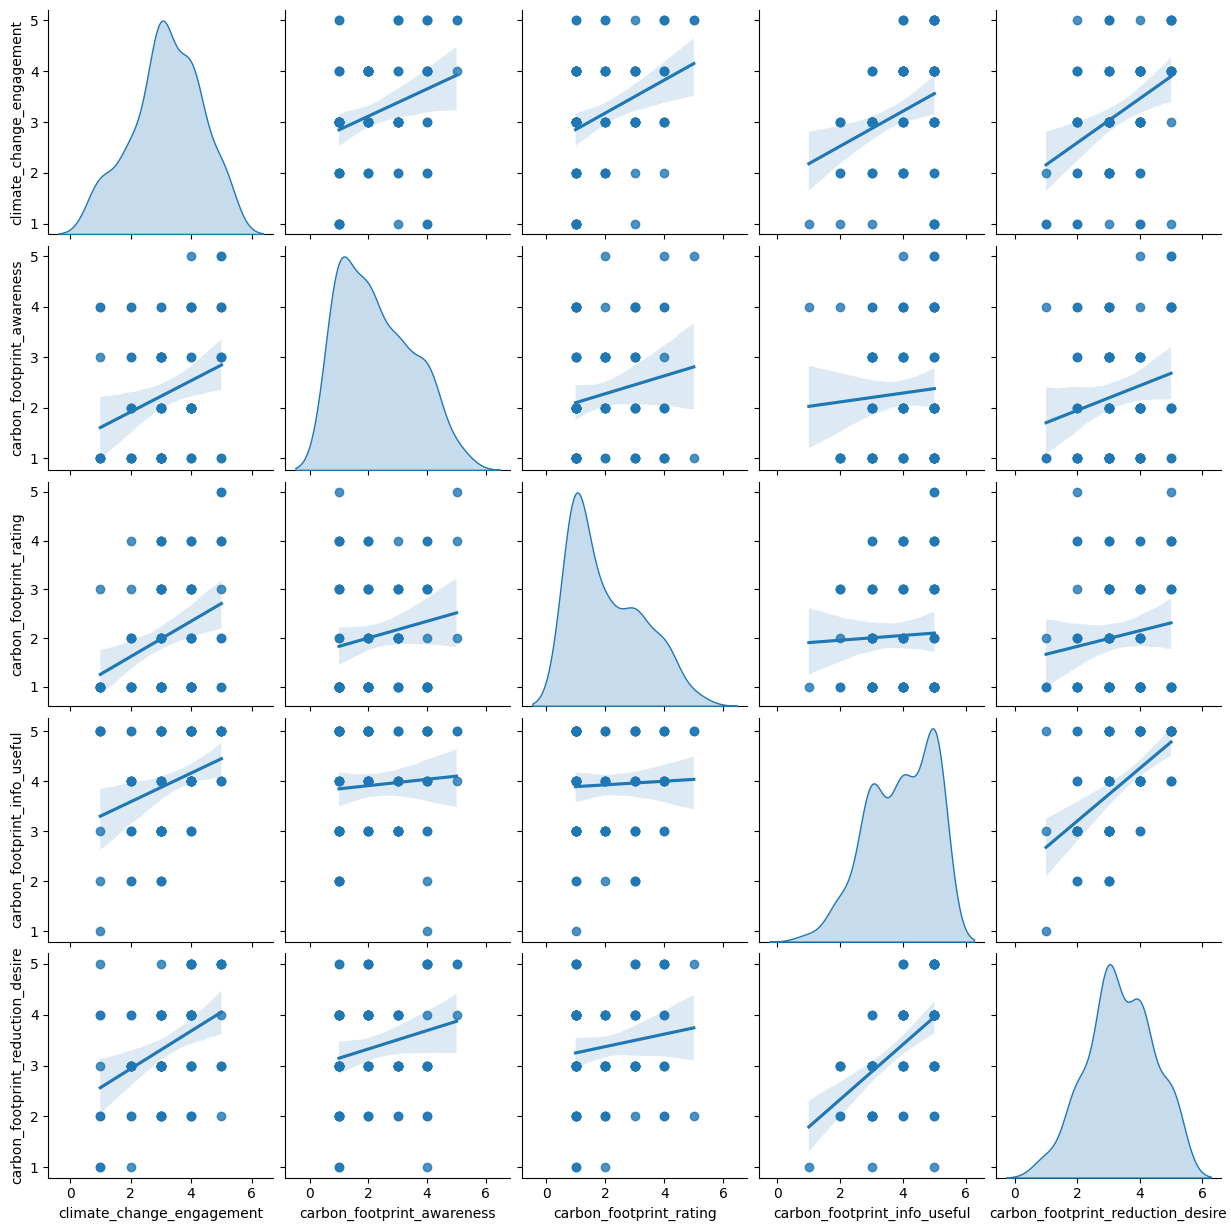

In [134]:
# Erreur interne de Seaborn (avec Numpy) en essayant de soustraire, lorsque pairplot est fourni avec des colonnes booléennes
sns.pairplot(data, kind="reg", diag_kind="kde");

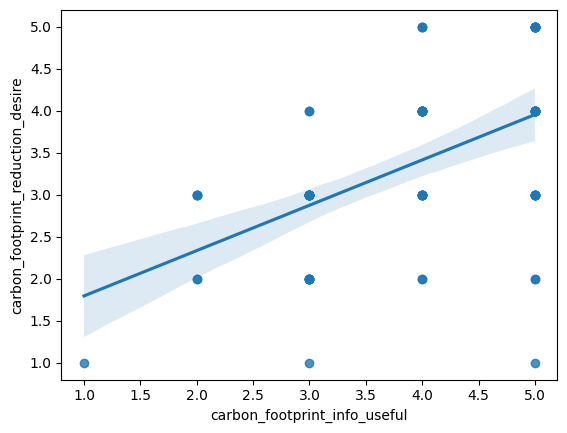

In [135]:
ax = sns.regplot(data=data, x='carbon_footprint_info_useful', y='carbon_footprint_reduction_desire');

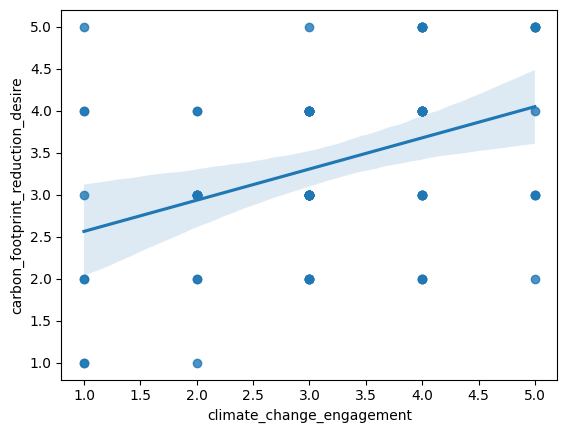

In [136]:
ax = sns.regplot(data=data, x='climate_change_engagement', y='carbon_footprint_reduction_desire')

Corrélation significative entre ceux qui se soucient de réduire leur empreinte carbone et ceux qui trouveraient utile d'avoir plus d'informations sur leur empreinte carbone.

= prise de conscience collective de la situation